In [1]:
#import the pandas library

import pandas as pd

The data we wish to analyze is in the file stats-experiment-1.txt. Note that the file is currently in the data directory. This can be seen by listing (ls) the contents of the data directory.

In [2]:
ls ../data

features_1.npy  features_7.npy          target_2.npy  target_8.npy
features_2.npy  features_8.npy          target_3.npy  Untitled.ipynb
features_3.npy  satisfaction.txt        target_4.npy  userdata1.parquet
features_4.npy  stats-experiment-1.txt  target_5.npy
features_5.npy  stats-experiment-2.txt  target_6.npy
features_6.npy  target_1.npy            target_7.npy


Next, we display a few lines from this file using the `head` command.

In [3]:
!head ../data/stats-experiment-1.txt

db8e4e8824c5	0.07%	110.2MiB / 983.9MiB
db8e4e8824c5	0.01%	110.2MiB / 983.9MiB
db8e4e8824c5	0.01%	110.2MiB / 983.9MiB
db8e4e8824c5	0.01%	110.2MiB / 983.9MiB
db8e4e8824c5	0.03%	110.2MiB / 983.9MiB
db8e4e8824c5	0.03%	110.2MiB / 983.9MiB
db8e4e8824c5	0.28%	110.2MiB / 983.9MiB
db8e4e8824c5	0.28%	110.2MiB / 983.9MiB
db8e4e8824c5	0.01%	110.2MiB / 983.9MiB
db8e4e8824c5	0.01%	110.2MiB / 983.9MiB


From this output, we can infer that the data is separated using a tab (`\t`)character and that the file has no header row. These arguments are passed to the CSV reader when we read the file.

In [4]:
# load the file data/stats-experiment-1.txt

stats_exp_1 = pd.read_csv("../data/stats-experiment-1.txt", 
                          sep="\t", 
                          header=None)

In this step, we tell `pandas` what names we would like to use for each column.

In [5]:
stats_exp_1.columns = ["container", "cpu_usage", "ram_usage"]

Here, we display the head of the `DataFrame` that was generated by the `pandas` CSV reader.

In [6]:
stats_exp_1.head()

,container,cpu_usage,ram_usage
0,[2J[Hdb8e4e8824c5,0.07%,110.2MiB / 983.9MiB
1,[2J[Hdb8e4e8824c5,0.01%,110.2MiB / 983.9MiB
2,[2J[Hdb8e4e8824c5,0.01%,110.2MiB / 983.9MiB
3,[2J[Hdb8e4e8824c5,0.01%,110.2MiB / 983.9MiB
4,[2J[Hdb8e4e8824c5,0.03%,110.2MiB / 983.9MiB


One issue we can make note of is that each of the values for `cpu_usage` contains the percent (`%`) symbol. In the next step, we use `.apply()` to remove this symbol.

In [7]:
stats_exp_1["cpu_usage"] = stats_exp_1["cpu_usage"].apply(lambda x: x.replace("%", ""))

In the next step we use a named function, remove_MiBS, To keep only the raw ram_usage number from the third column.

In [8]:
def remove_MiBS(value):
    return value.replace("MiB / 983.9MiB", "")

Here, we demonstrate how this function works by passing a sample string that resembles the data in the `raw_usage` column.

In [9]:
remove_MiBS("106.7MiB / 983.9MiB")

'106.7'

Having confirms it works properly, we apply the named function `remove_MiBS` to the `ram_usage` column.

In [10]:
stats_exp_1["ram_usage"] = stats_exp_1["ram_usage"].apply(remove_MiBS)

Once more, we display the head of the `DataFrame`.

In [11]:
stats_exp_1.head()

,container,cpu_usage,ram_usage
0,[2J[Hdb8e4e8824c5,0.07,110.2
1,[2J[Hdb8e4e8824c5,0.01,110.2
2,[2J[Hdb8e4e8824c5,0.01,110.2
3,[2J[Hdb8e4e8824c5,0.01,110.2
4,[2J[Hdb8e4e8824c5,0.03,110.2


There is still another issue with our data. The issue is that our data is currently stored as `object` type data.

In [12]:
stats_exp_1.dtypes

container    object
cpu_usage    object
ram_usage    object
dtype: object

Here, we correctly cast the data type of the final two columns to be floating-point numbers.

In [13]:
stats_exp_1["cpu_usage"] = stats_exp_1["cpu_usage"].astype(float)
stats_exp_1["ram_usage"] = stats_exp_1["ram_usage"].astype(float)

Next, let's look at the `.dtypes` to confirm that it worked correctly.

In [14]:
stats_exp_1.dtypes

container     object
cpu_usage    float64
ram_usage    float64
dtype: object

In order to prepare the data for a nice plot we will use a time index for the `DataFrame`s index. The time unit for this analysis is arbitrary and we will use seconds (`unit="s"`). 

In [15]:
stats_exp_1.index = pd.TimedeltaIndex(data=stats_exp_1.index, unit="s")

Once more, display the `.head()`.

In [16]:
stats_exp_1.head()

,container,cpu_usage,ram_usage
00:00:00,[2J[Hdb8e4e8824c5,0.07,110.2
00:00:01,[2J[Hdb8e4e8824c5,0.01,110.2
00:00:02,[2J[Hdb8e4e8824c5,0.01,110.2
00:00:03,[2J[Hdb8e4e8824c5,0.01,110.2
00:00:04,[2J[Hdb8e4e8824c5,0.03,110.2


Finally, we select the `ram_usage` and `cpu_usage` columns and use them to generate a plot. 

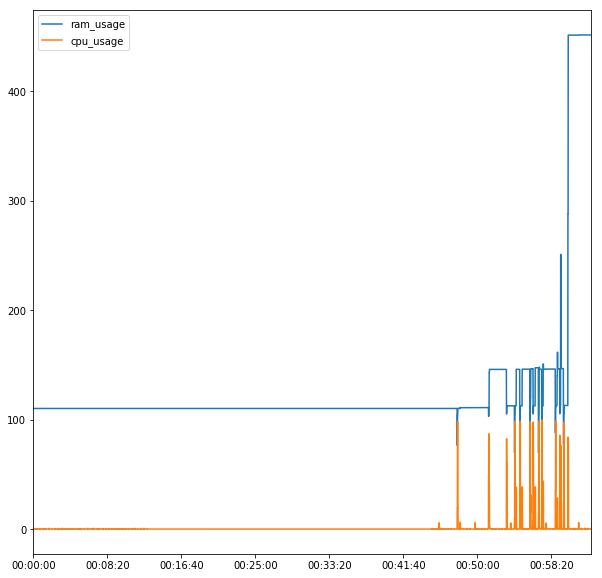

In [17]:
%matplotlib inline

stats_exp_1[["ram_usage", "cpu_usage"]].plot(figsize=(10,10))